In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [77]:
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df = pd.read_csv('datasets/adult-all.csv', na_values='?')
df.shape

(48841, 15)

<h3> DATA PREPROCESSING </h3>

In [78]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [79]:
df.rename(columns={'39': 'age', 'State-gov': 'workclass', '77516': 'fnlwgt', 'Bachelors': 'education', '13': 'education_num', 'Never-married': 'marital_status',
                   'Adm-clerical': 'occupation', 'Not-in-family': 'relationship', 'White': 'race', 'Male': 'gender', '2174': 'capital_gain',
                   '0': 'capital_loss', '40': 'hours_per_week', 'United-States': 'native_country', '<=50K': 'income_bracket'}, inplace=True)

In [80]:
df.drop(['capital_loss','capital_gain'],axis=1,inplace=True) # Dropping capital gain and capital loss because they're not useful for our analysis.

In [81]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,income_bracket
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [82]:
'''

THE BELOW SOLUTION WAS BEFORE I FOUND OUT ABOUT REPLACING THE NAN VALUES IN THE READ_CSV FUNCTION METHOD.

'''

    
'''
# In the csv file, I can see unknown values are marked as "?". Find the total number of ?'s.
df["q_rows"] = df[df == "?"].any(axis=1)
df.head()
true_count = df['q_rows'].sum() # I'm able to sum them as True = 1 and False = 0.
print(true_count)
# I want to move on with the dataset so I will not look for each ? and try to find a suitable value for it. I will just drop them.
df.drop(df[df['q_rows'] == True].index, inplace=True)
df.head()
df.drop('q_rows', axis=1, inplace=True)
'''

'\n# In the csv file, I can see unknown values are marked as "?". Find the total number of ?\'s.\ndf["q_rows"] = df[df == "?"].any(axis=1)\ndf.head()\ntrue_count = df[\'q_rows\'].sum() # I\'m able to sum them as True = 1 and False = 0.\nprint(true_count)\n# I want to move on with the dataset so I will not look for each ? and try to find a suitable value for it. I will just drop them.\ndf.drop(df[df[\'q_rows\'] == True].index, inplace=True)\ndf.head()\ndf.drop(\'q_rows\', axis=1, inplace=True)\n'

In [83]:
df = df.dropna()

In [84]:
df.shape

(45221, 13)

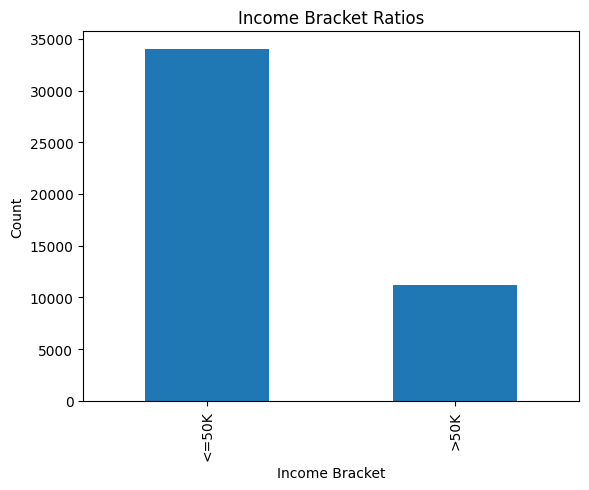

In [85]:
below_50k = df['income_bracket'].value_counts()['<=50K'] # Didn't encode these just yet because I wanted to try something.
above_50k = df['income_bracket'].value_counts()['>50K']

df['income_bracket'].value_counts().plot(kind='bar')

plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.title('Income Bracket Ratios')

plt.show()

In [86]:
print(below_50k)
print(above_50k)
print(above_50k / (above_50k+below_50k))
print(below_50k / (above_50k+below_50k))

34013
11208
0.2478494504765485
0.7521505495234515


Interestingly, the <=50k amount is much higher that the opposite. Imbalanced.

In [87]:
categorical_columns = {
    'workclass': 'ordinal',
    'marital_status': 'ordinal',
    'occupation': 'label',
    'relationship': 'label',
    'race': 'label',
    'gender': 'label',
    'native_country': 'label',
    'education': 'ordinal'
}

# Perform encoding for each categorical column
for column, encoding_method in categorical_columns.items():
    if encoding_method == 'ordinal':
        ordinal_encoder = OrdinalEncoder()
        df[column + '_encoded'] = ordinal_encoder.fit_transform(df[[column]]).astype(int)
    elif encoding_method == 'label':
        label_encoder = LabelEncoder()
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])
        

df['income_bracket'] = df['income_bracket'].replace({'<=50K': 0, '>50K': 1}).astype(int)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,...,native_country,income_bracket,workclass_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,gender_encoded,native_country_encoded,education_encoded
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,0,4,2,3,0,4,1,38,9
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,0,2,0,5,1,4,1,38,11
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,0,2,2,5,0,2,1,38,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,0,2,2,9,5,2,0,4,9
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,United-States,0,2,2,3,5,4,0,38,12


<h3>EDA</h3>

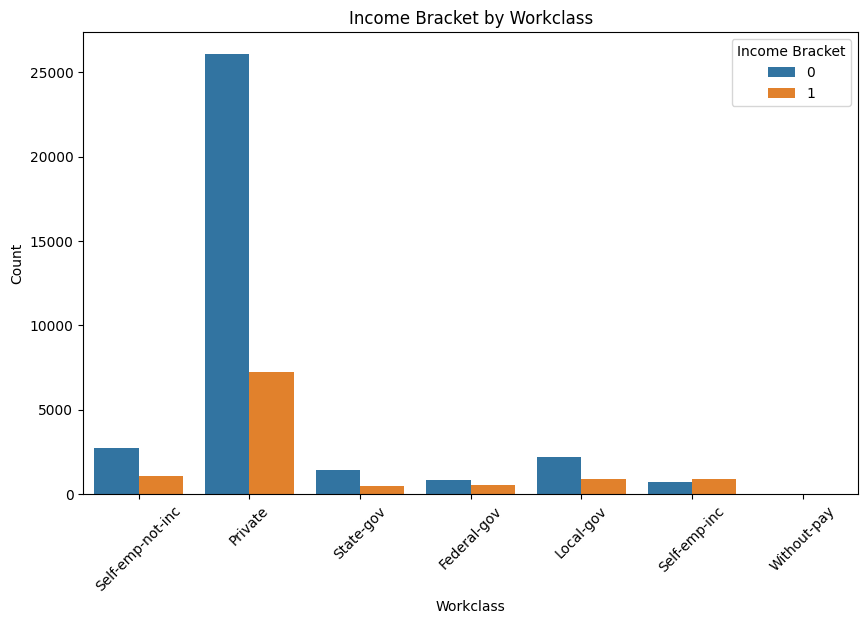

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='workclass', hue='income_bracket')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Income Bracket by Workclass')
plt.xticks(rotation=45)
plt.legend(title='Income Bracket')
plt.show()

Is this because there's a lot more data from people in working class 2? Let's find out.

<Axes: >

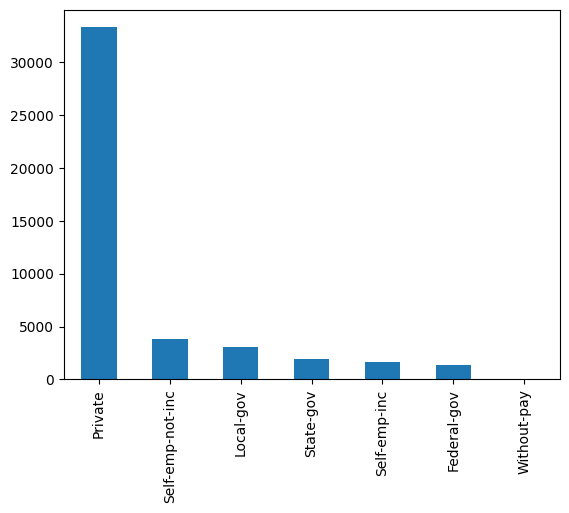

In [89]:
df["workclass"].value_counts().plot(kind='bar')

Yes it is! Maybe using percentages per working class is a better representation of the truth.

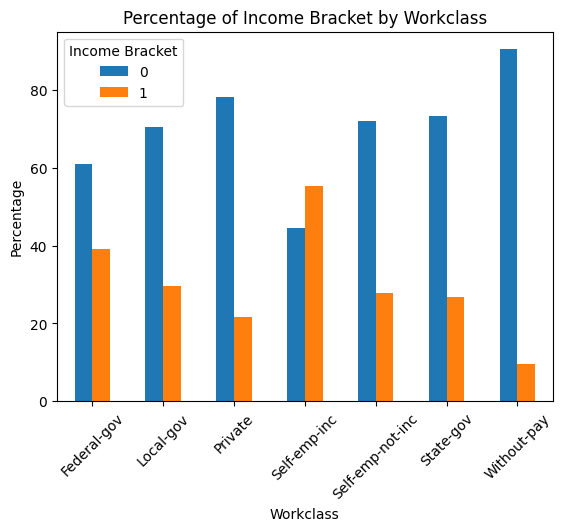

In [90]:
percentage_df = pd.pivot_table(data=df, index='workclass', columns='income_bracket', aggfunc='size')
percentage_df = percentage_df.div(percentage_df.sum(axis=1), axis=0) * 100

# Plotting example
percentage_df.plot(kind='bar')
plt.xlabel('Workclass')
plt.ylabel('Percentage')
plt.title('Percentage of Income Bracket by Workclass')
plt.legend(title='Income Bracket')
plt.xticks(rotation=45)
plt.show()

So I believe it looks like only the Self-emp-inc workclass has a majority in the >$50K range.

This is enough EDA for now, I will continue later.

<h3>MODEL BUILDING</h3>

In [91]:
columns_to_drop = [column for column in df.columns if 'encoded' not in column and column not in ['age', 'fnlwgt', 'education_num', "capital_gain", "capital_loss", "hours_per_week"]]

X = df.drop(columns_to_drop, axis=1)  
Y = df['income_bracket']
# X.head()

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
# I'll try logistic regression, naive bayes, random forest and SVM.

In [93]:
'''
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_train, Y_train)
'''

"\nsvc = SVC(kernel='linear', random_state=0)\nsvc.fit(X_train, Y_train)\n"

In [94]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [95]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

GaussianNB()

In [96]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [97]:
'''
Y_pred_train_svc = svc.predict(X_train)  # Predict on the training data
train_score_svc = accuracy_score(Y_train, Y_pred_train_svc)  # Calculate the training accuracy
print("SVC Training Accuracy:", train_score_svc)
Y_pred_svc = svc.predict(X_test)
test_score_svc = accuracy_score(Y_test, Y_pred_svc)
print("SVC Test Accuracy:", test_score_svc)
'''

Y_pred_train_logreg = logreg.predict(X_train)
train_score_logreg = accuracy_score(Y_train, Y_pred_train_logreg)
Y_pred_logreg = logreg.predict(X_test)
test_score_logreg = accuracy_score(Y_test, Y_pred_logreg)
print("Logistic Regression Training Accuracy:", train_score_logreg)
print("Logistic Regression Test Accuracy:", test_score_logreg)

Y_pred_train_naive_bayes = naive_bayes.predict(X_train)
train_score_naive_bayes = accuracy_score(Y_train, Y_pred_train_naive_bayes)
Y_pred_naive_bayes = naive_bayes.predict(X_test)
test_score_naive_bayes = accuracy_score(Y_test, Y_pred_naive_bayes)
print("Naive Bayes Training Accuracy:", train_score_naive_bayes)
print("Naive Bayes Test Accuracy:", test_score_naive_bayes)

Y_pred_train_random_forest = random_forest.predict(X_train)
train_score_random_forest = accuracy_score(Y_train, Y_pred_train_random_forest)
Y_pred_random_forest = random_forest.predict(X_test)
test_score_random_forest = accuracy_score(Y_test, Y_pred_random_forest)
print("Random Forest Training Accuracy:", train_score_random_forest)
print("Random Forest Test Accuracy:", test_score_random_forest)

Logistic Regression Training Accuracy: 0.7509674922600619
Logistic Regression Test Accuracy: 0.7568822553897181
Naive Bayes Training Accuracy: 0.7860736399823087
Naive Bayes Test Accuracy: 0.7900497512437811
Random Forest Training Accuracy: 0.9998617868199912
Random Forest Test Accuracy: 0.8279712548369265


In [98]:
# svcscore = cross_val_score(svc, X, Y, cv=5)  # Perform cross-validation with 5 folds
logrscore = cross_val_score(logreg, X, Y, cv=5)
nbscore = cross_val_score(naive_bayes, X, Y, cv=5)
rfscore = cross_val_score(random_forest, X, Y, cv=5)

# print("SVC Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(svcscore.mean(), svcscore.std() * 2))
print("Logistic Regression Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(logrscore.mean(), logrscore.std() * 2))
print("Naive Bayes Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(nbscore.mean(), nbscore.std() * 2))
print("Random Forest Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(rfscore.mean(), rfscore.std() * 2))

Logistic Regression Cross-Validation Accuracy: 0.75 (+/- 0.00)
Naive Bayes Cross-Validation Accuracy: 0.79 (+/- 0.01)
Random Forest Cross-Validation Accuracy: 0.82 (+/- 0.00)


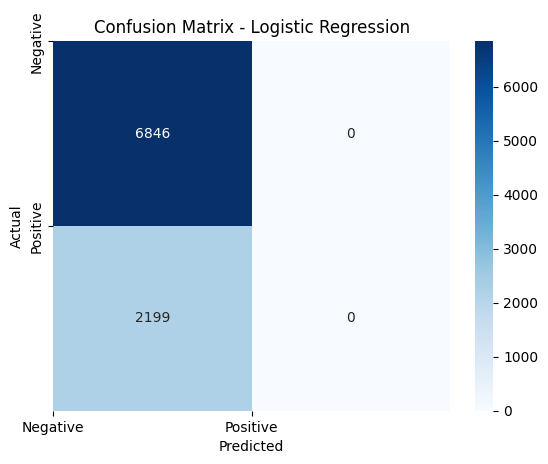

In [99]:
cm_logreg = confusion_matrix(Y_test, Y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

plt.show()


In [100]:
cm_logreg

array([[6846,    0],
       [2199,    0]], dtype=int64)

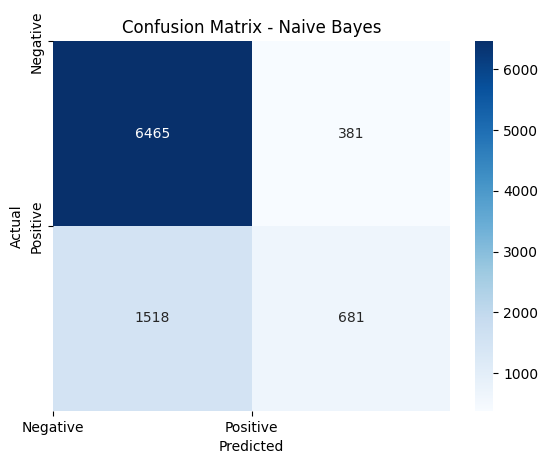

In [101]:
cm_naive_bayes = confusion_matrix(Y_test, Y_pred_naive_bayes)
sns.heatmap(cm_naive_bayes, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

plt.show()


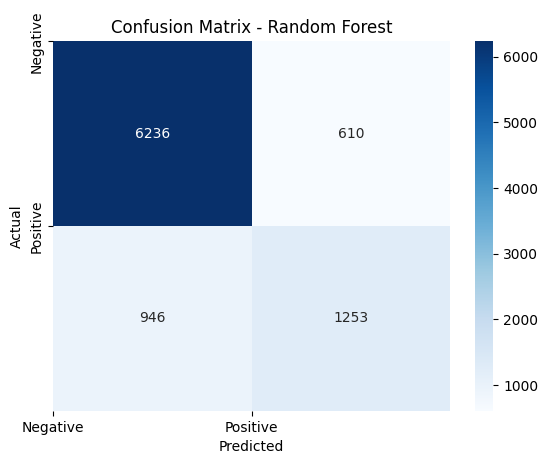

In [102]:
cm_random_forest = confusion_matrix(Y_test, Y_pred_random_forest)
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

plt.show()


<h3> NOT REALLY SURE WHAT HAPPENED HERE, EITHER MY MODELS ARE WRONG OR IT'S BECAUSE THE DATA IS SKEWED </h3>